**Objetivo:**

El objetivo de este código es analizar las propiedades fisicoquímicas del vino para comprender cómo influyen en su calidad. Se utilizará un conjunto de datos de Kaggle para identificar patrones y desarrollar un modelo predictivo que pueda estimar la calidad del vino (clasificada en malo, regular y bueno) en base a sus características fisicoquímicas.

**Metodología:**

1- Exploración de datos: Se utilizarán herramientas de visualización como Seaborn y Matplotlib para explorar y comprender la distribución de las variables, identificar relaciones entre ellas y visualizar la calidad del vino en función de sus propiedades fisicoquímicas.

2- Preprocesamiento de datos: Se gestionarán los datos faltantes, se codificarán las variables categóricas y se escalarán las variables numéricas para garantizar su compatibilidad con el modelo de aprendizaje automático.

3- Modelado de aprendizaje automático: Se implementará un modelo de aprendizaje supervisado de clasificación para predecir la calidad del vino en función de sus propiedades fisicoquímicas.

4- Evaluación del modelo: Se evaluará el rendimiento del modelo utilizando métricas como la precisión y la exactitud para determinar su eficacia en la predicción de la calidad del vino.

In [2]:
#Importación de paquetes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#Carga del documento desde drive
df = pd.read_csv('/content/drive/My Drive/winequality-red.csv')


In [5]:
#Vista datos
df.head(20)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Análisis Exploratorio de Datos  (EDA)**

In [6]:
# Detección de valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Creación de un diccionario para almacenar las estadísticas
statistics = {}

# Calcular media, mediana y moda para cada variable
for column in df.columns:
    mean_value = np.mean(df[column])
    median_value = np.median(df[column])
    mode_value = df[column].mode()[0] if not df[column].mode().empty else np.nan  # Verificar si la moda no está vacía

    statistics[column] = {
        'Media': mean_value,
        'Mediana': median_value,
        'Moda': mode_value
    }

# Imprimir las estadísticas
for column, stats in statistics.items():
    print(f"{column}:")
    print(f"  Media: {stats['Media']}")
    print(f"  Mediana: {stats['Mediana']}")
    print(f"  Moda: {stats['Moda']}\n")

fixed acidity:
  Media: 8.31963727329581
  Mediana: 7.9
  Moda: 7.2

volatile acidity:
  Media: 0.5278205128205128
  Mediana: 0.52
  Moda: 0.6

citric acid:
  Media: 0.2709756097560976
  Mediana: 0.26
  Moda: 0.0

residual sugar:
  Media: 2.53880550343965
  Mediana: 2.2
  Moda: 2.0

chlorides:
  Media: 0.08746654158849279
  Mediana: 0.079
  Moda: 0.08

free sulfur dioxide:
  Media: 15.874921826141339
  Mediana: 14.0
  Moda: 6.0

total sulfur dioxide:
  Media: 46.46779237023139
  Mediana: 38.0
  Moda: 28.0

density:
  Media: 0.9967466791744841
  Mediana: 0.99675
  Moda: 0.9972

pH:
  Media: 3.3111131957473416
  Mediana: 3.31
  Moda: 3.3

sulphates:
  Media: 0.6581488430268917
  Mediana: 0.62
  Moda: 0.6

alcohol:
  Media: 10.422983114446529
  Mediana: 10.2
  Moda: 9.5

quality:
  Media: 5.6360225140712945
  Mediana: 6.0
  Moda: 5



In [8]:
fixed_acidity= "Acidez fija"
volatile_acidity=	"Acidez volátil"
citric_acid= "Acido cítrico"
residual_sugar= "Azúcar residual"
chlorides= "Cloruros"
free_sulfur_dioxide= "Dióxido de azufre libre"
total_sulfur_dioxide=	"Dióxido de azufre total"
density=	"Densidad"
pH= "PH"
sulphates= "Sulfatos"
alcohol= "Alcohol"
quality= "Calidad"


In [9]:
df.groupby('quality')

In [10]:
# Convertir la variable de calidad en categórica
bins = [0, 4, 6, 10]
labels = ['malo', 'regular', 'bueno']
df['calidad'] = pd.cut(df['quality'], bins=bins, labels=labels, include_lowest=True)

In [11]:
print(df[['quality', 'calidad']].head(10))

   quality  calidad
0        5  regular
1        5  regular
2        5  regular
3        6  regular
4        5  regular
5        5  regular
6        5  regular
7        7    bueno
8        7    bueno
9        5  regular


**Visualizaciones**

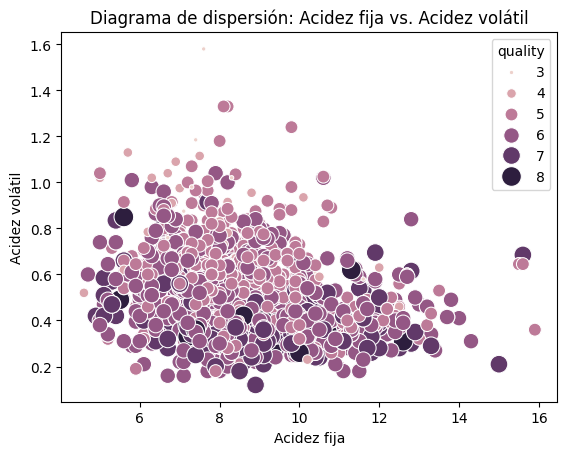

In [12]:
# Diagrama de dispersión: Acidez fija vs. Acidez volátil
sns.scatterplot(data=df, x='fixed acidity', y='volatile acidity', hue='quality',size='quality', sizes=(10,200), legend='brief')
plt.xlabel('Acidez fija')
plt.ylabel('Acidez volátil')
plt.title('Diagrama de dispersión: Acidez fija vs. Acidez volátil')
plt.show()


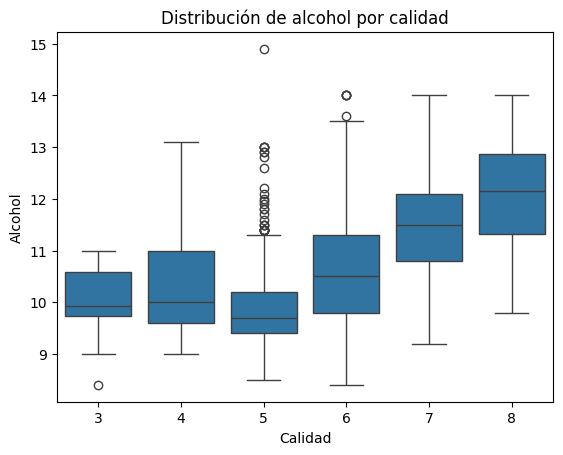

In [13]:
# Boxplot: Distribución de contenido de alcohol por calidad del vino
sns.boxplot(x='quality', y='alcohol', data=df)
plt.xlabel('Calidad')
plt.ylabel('Alcohol')
plt.title('Distribución de alcohol por calidad')
plt.show()

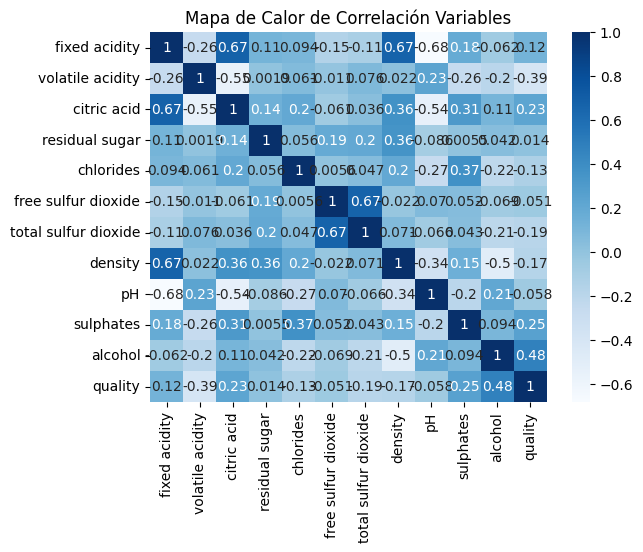

In [14]:
# Heatmap: Correlación Variables
correlation = df.drop(columns=['calidad']).corr()
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.title("Mapa de Calor de Correlación Variables")
plt.show()

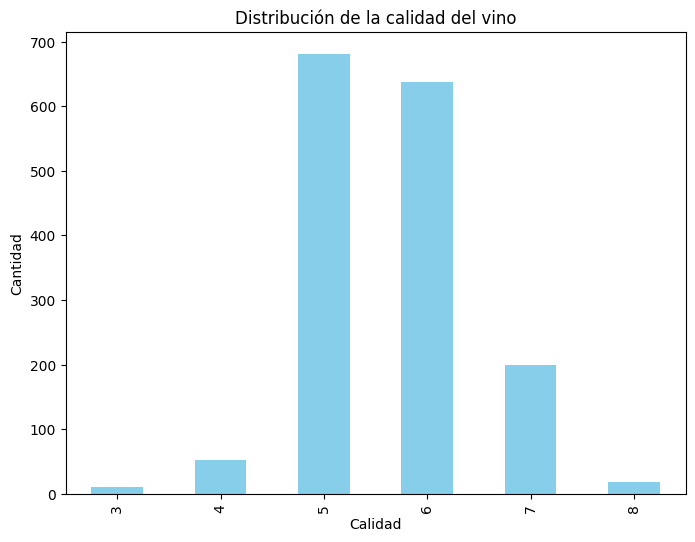

In [15]:
# Gráfico de barras: Distribución de la calidad del vino
plt.figure(figsize=(8, 6))
df['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de la calidad del vino')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.show()

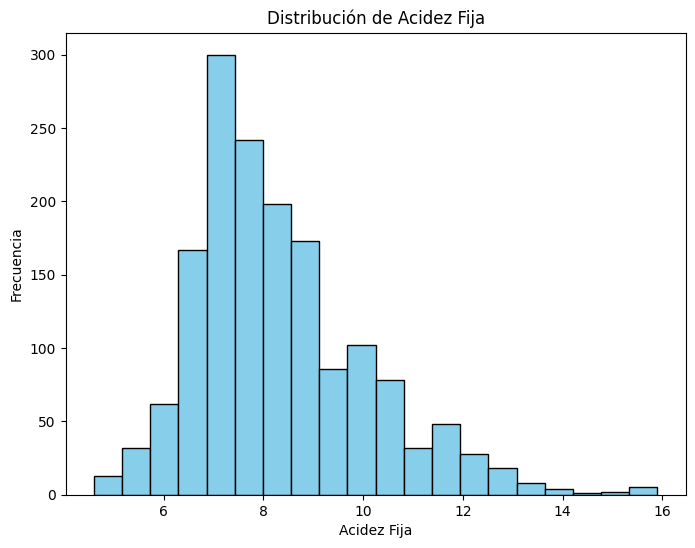

In [16]:
# Histograma: Distribución de Acidez Fija
plt.figure(figsize=(8, 6))
plt.hist(df['fixed acidity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Acidez Fija')
plt.ylabel('Frecuencia')
plt.title('Distribución de Acidez Fija')
plt.show()

In [17]:
sulfatos = df.groupby('quality')['sulphates'].mean()

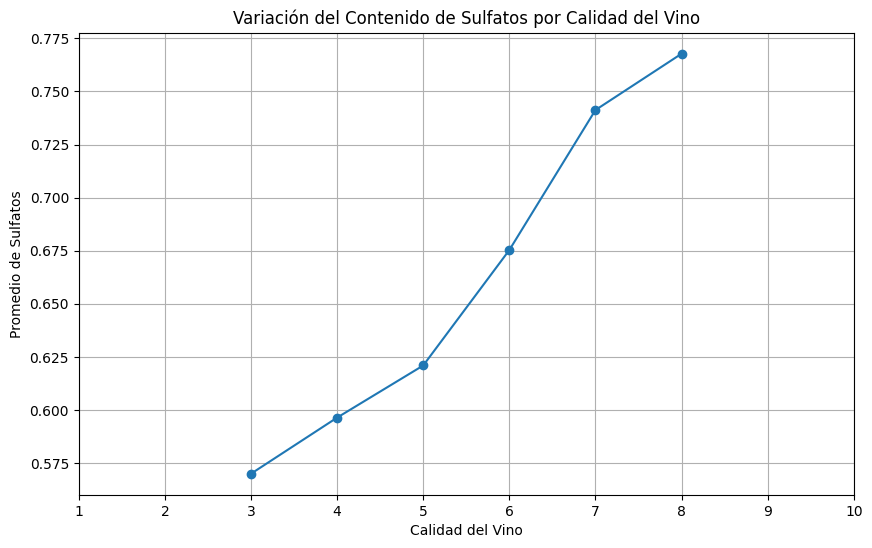

In [18]:
#Gráfico de Líneas: Contenido de Sulfatos por Calidad del Vino
plt.figure(figsize=(10, 6))
plt.plot(sulfatos.index, sulfatos.values, marker='o', linestyle='-')
plt.xlabel('Calidad del Vino')
plt.ylabel('Promedio de Sulfatos')
plt.title('Variación del Contenido de Sulfatos por Calidad del Vino')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

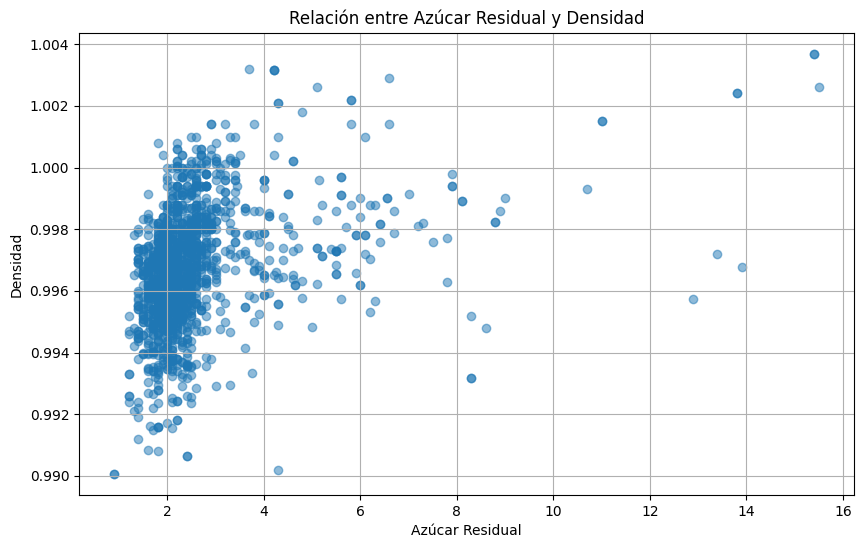

In [19]:
#Diagrama de Dispersión: Relación entre Azúcar Residual y Densidad
plt.figure(figsize=(10, 6))
plt.scatter(df['residual sugar'], df['density'], alpha=0.5)
plt.xlabel('Azúcar Residual')
plt.ylabel('Densidad')
plt.title('Relación entre Azúcar Residual y Densidad')
plt.grid(True)
plt.show()

**Machine Learning**

Se decidió implementar un modelo supervisado. En este caso, el conjunto de datos del vino tinto incluye mediciones físico-químicas del vino (características de entrada) y la calidad del vino (que funciona como la variable objetivo).

In [20]:
#Preparar el modelo. Separar variables predictivas de la variable objetivo
X = df.drop(['quality', 'calidad'], axis=1)
y = df['calidad']

In [21]:
#Dividir el conjunto de datos para el entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Regresión Logística**

In [23]:
# Entrenar el modelo Regresión Logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [53]:
# Predecir y evaluar
y_pred_logreg = logreg.predict(X_test)
print("Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

Regresión Logística:
              precision    recall  f1-score   support

       bueno       0.57      0.28      0.37        47
        malo       0.00      0.00      0.00        11
     regular       0.85      0.96      0.90       262

    accuracy                           0.83       320
   macro avg       0.47      0.41      0.42       320
weighted avg       0.78      0.83      0.79       320

[[ 13   0  34]
 [  0   0  11]
 [ 10   0 252]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


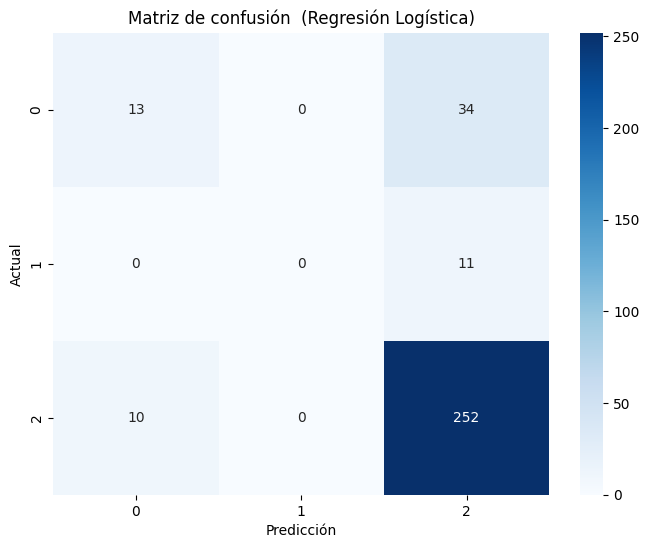

In [52]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de confusión  (Regresión Logística)')
plt.show()

**Random Forest**

In [54]:
#Busqueda de hiperparámetros
param_grid= {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split':[2,5,10]
}
grid_search= GridSearchCV(rf,param_grid,cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [42]:
#Entrenar el modelo Random Forest
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
#Predecir y evaluar
y_pred= rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       bueno       0.69      0.57      0.63        47
        malo       0.00      0.00      0.00        11
     regular       0.89      0.95      0.92       262

    accuracy                           0.87       320
   macro avg       0.53      0.51      0.52       320
weighted avg       0.83      0.87      0.85       320

[[ 27   0  20]
 [  0   0  11]
 [ 12   0 250]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
y_pred_rf = rf.predict(X_test)

In [45]:
# Optimizacion modelo
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

              precision    recall  f1-score   support

       bueno       0.76      0.53      0.62        47
        malo       0.00      0.00      0.00        11
     regular       0.89      0.97      0.93       262

    accuracy                           0.87       320
   macro avg       0.55      0.50      0.52       320
weighted avg       0.84      0.87      0.85       320

[[ 25   0  22]
 [  0   0  11]
 [  8   0 254]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


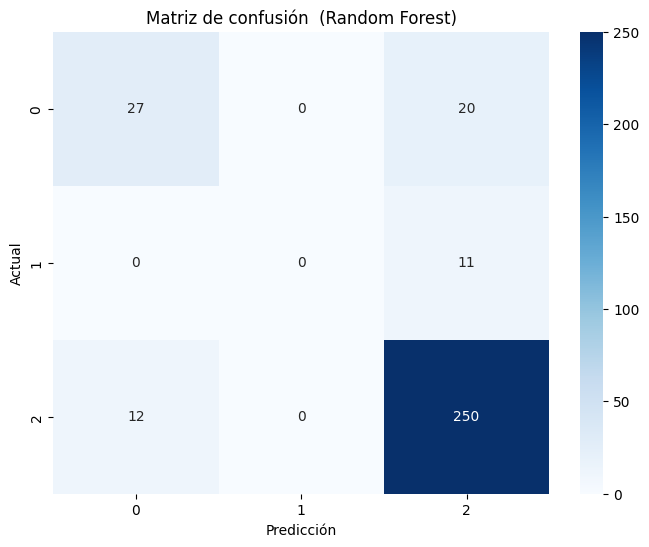

In [51]:
# Visualización de la matriz de confusión para Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de confusión  (Random Forest)')
plt.show()

**Conclusiones**



 El modelo Random Forest tiene un mejor rendimiento general con un accuracy más alto frente al de Regresión Lineal (0.87 vs. 0.83).
El análisis confirma que las propiedades fisicoquímicas del vino tienen una relación significativa con su calidad. El modelo de Random Forest ha demostrado ser más efectivo que la Regresión Logística, especialmente para la predicción de la clase "Bueno". La optimización adicional del Random Forest ha llevado a mejoras incrementales en la precisión y el recall.
En resumen, los resultados apoyan la hipótesis de que ciertas propiedades fisicoquímicas están correlacionadas con la calidad del vino y que un modelo de Random Forest optimizado puede ser utilizado eficazmente para predecir la calidad del vino basándose en estas propiedades. Este enfoque puede ser una herramienta valiosa para los productores de vino, ayudándoles a mejorar la calidad de sus productos mediante el ajuste de propiedades fisicoquímicas específicas.


```
# This is formatted as code
```

